# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [67]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [7]:
#checking dataframe
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.count()

temperature    130
gender         130
heart_rate     130
dtype: int64

# 1. Is the distribution of body temperatures normal? 

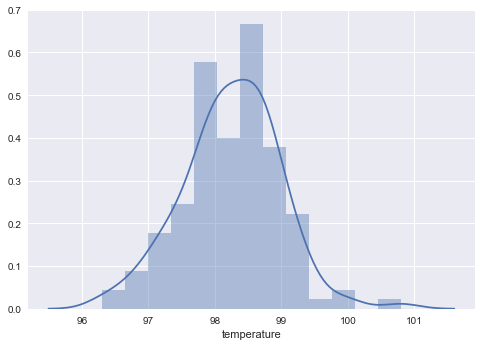

In [68]:
#plot histograph of temperature to see how it is distributed
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
_= sns.distplot(df['temperature'])
sns.plt.show()  

Based on this graphical representation, this distribution appears to be normal.  

In [83]:
#importing scipy stats package
from scipy import stats
import pylab

k,p = stats.shapiro(df['temperature'])
print("The test statistic is %s and the p-value is %s" % (k,p))

The test statistic is 0.9865770936012268 and the p-value is 0.233174666762352


Based on this p-value from the Shapiro-Wilk test, the sample does not appear to be from a normal distribution.

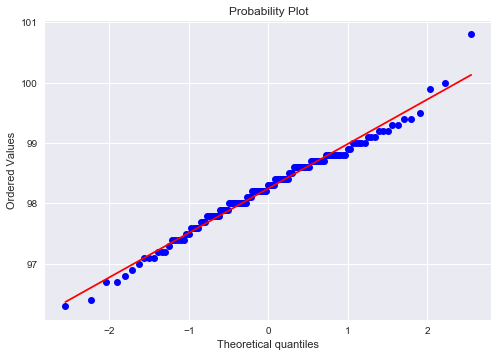

In [84]:
#creating the Q-Q plot to check for Normality

_=stats.probplot(df['temperature'], dist='norm', plot=pylab)
pylab.show()

Based on the Q-Q plot, this same distribution appears to be normal. 

In [71]:
#Creating an array of means from a given sample and size
def clt(sample,sample_size, iterations):
    means = np.empty(iterations)
    for i in range(iterations):
        new_sample = np.random.choice(sample,size=sample_size)
        n_mean = np.mean(new_sample)
        means[i]=n_mean
    return means    

In [80]:
n100000 = clt(df['temperature'],10000,10000)
n100000

array([ 98.25734,  98.25898,  98.24841, ...,  98.24542,  98.25007,
        98.24783])

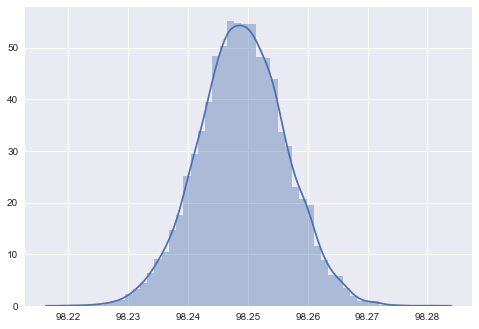

In [82]:
_ = sns.distplot(n100000)
sns.plt.show()

# 2. Is the sample size large? Are the observations independent?

The n in this sample is 130, which constitutes a large sample size.  The observations should be independent. 

# 3. Is the true population mean really 98.6 degrees F? 

In [97]:
#bootstrap test
temp = df['temperature']
def bootstrap_test(sample,size):
    means = np.empty(size)
    for i in range(size):
        new_sample = np.random.choice(sample,size=len(sample))
        n_mean = np.mean(new_sample)
        means[i]=n_mean
    mu = np.mean(means)
    std = np.std(means)
    return mu, std


In [101]:
bootstrap_test(temp,100000)

(98.249256946153821, 0.064114038710247498)

Based on the bootstrap distribution, the mean of a bootstrap distribution with 100,000 iterations has a mean close to 98.25.  